<a href="https://colab.research.google.com/github/Gellimer989/Diabetes-Prdiction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes-dataset.csv to diabetes-dataset.csv


In [ ]:
df = pd.read_csv('diabetes-dataset.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [ ]:
df.shape

(2000, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


Text(0, 0.5, 'Count')

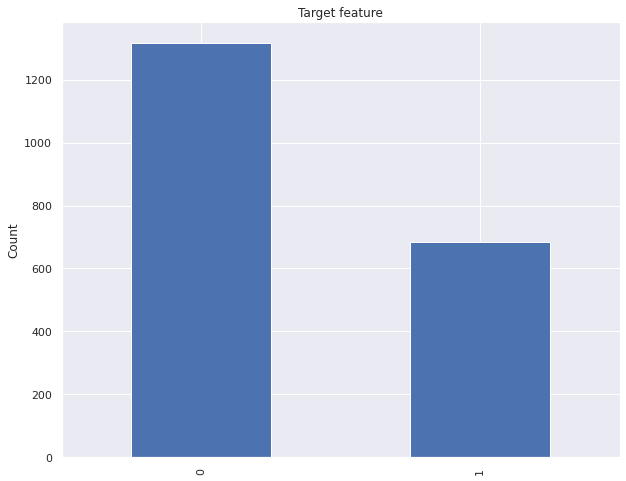

In [ ]:
p_bar = df['Outcome'].value_counts().plot(kind='bar', title='Target feature', figsize=(10,8))
p_bar.set_ylabel('Count')

In [ ]:
false, true = df.groupby('Outcome').size()
print('0 :' , false)
print('1 :' , true)


0 : 1316
1 : 684


In [ ]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307
1,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140


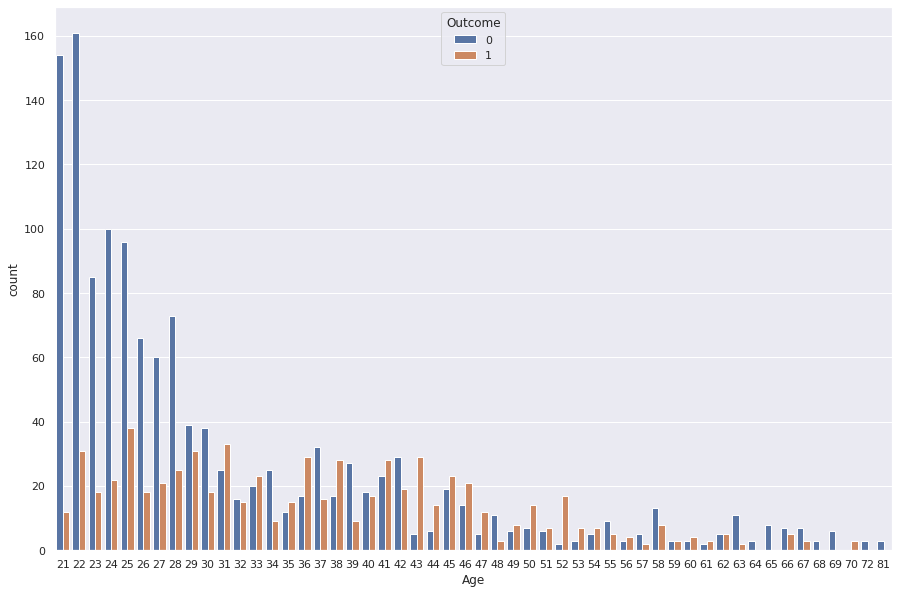

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x='Age',data = df,hue='Outcome')

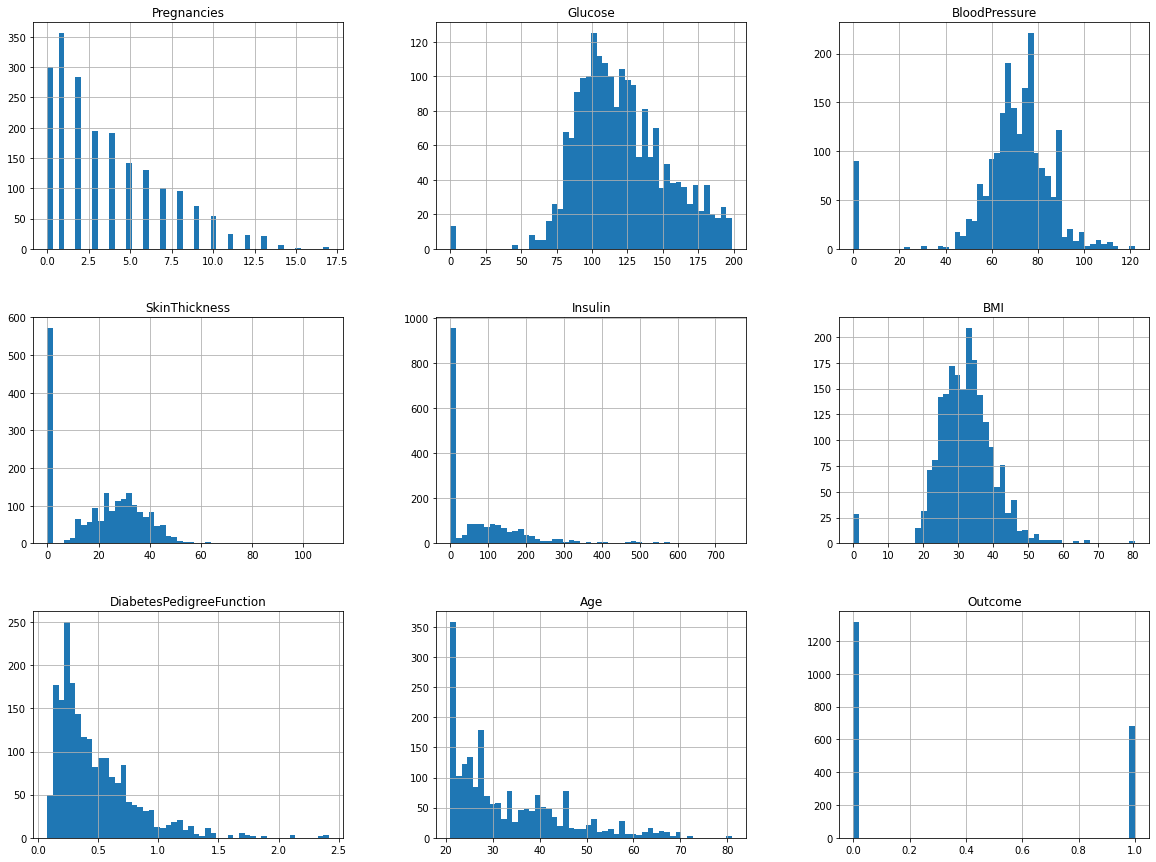

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df.isin({0}).sum()

Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

In [ ]:
Cant_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']
df[Cant_zeros] = df[Cant_zeros].replace(0, np.nan)

In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(1035, 9)

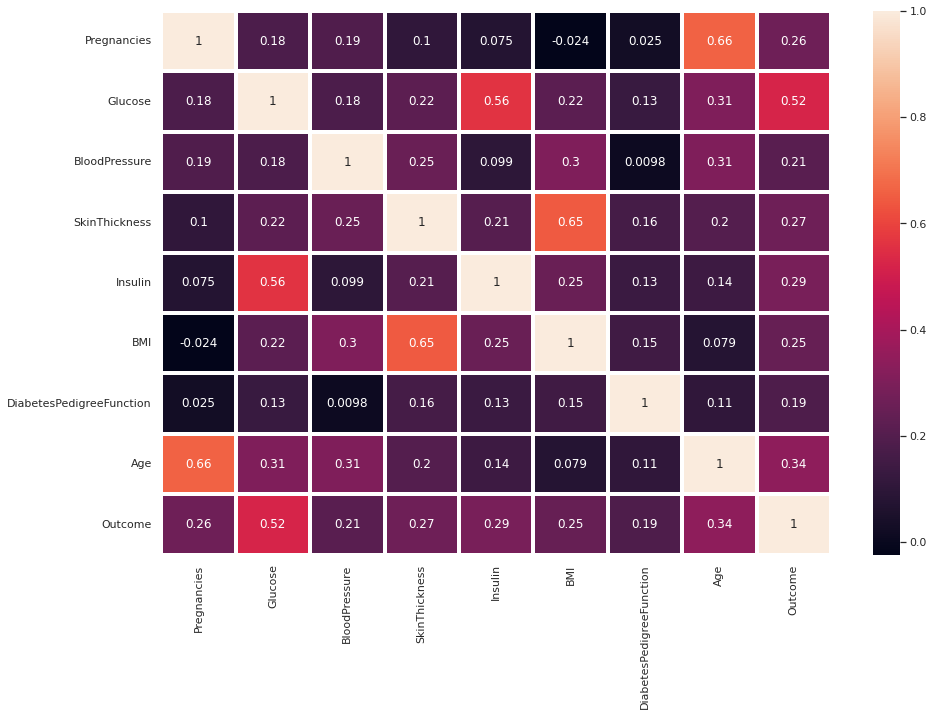

In [ ]:
plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), linewidth=3, annot=True)

In [ ]:
corr_matrix = df.corr()
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.521607
Age                         0.342062
Insulin                     0.291712
SkinThickness               0.267475
Pregnancies                 0.264722
BMI                         0.247129
BloodPressure               0.212382
DiabetesPedigreeFunction    0.185973
Name: Outcome, dtype: float64

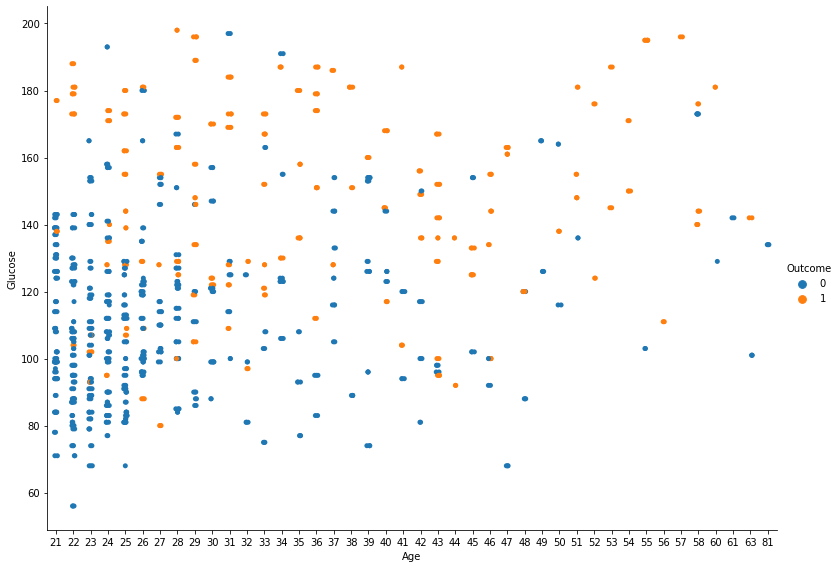

In [ ]:
sns.catplot(x='Age',y='Glucose',data=df,hue='Outcome', height=8, aspect=11/8)

In [ ]:
X = df.drop(['Outcome'],axis=1) 
Y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
x_test.shape,y_test.shape,x_train.shape,y_train.shape

((207, 8), (207,), (828, 8), (828,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def print_metrics(y_test, y_pred):
    print('1. Accuracy: {}'.format(round(accuracy_score(y_test, y_pred), 2)))
    print('2. Precision: {}'.format(round(precision_score(y_test, y_pred), 2)))
    print('3. Recall: {}'.format(round(recall_score(y_test, y_pred), 2)))
    print('4. F1 score: {}'.format(round(f1_score(y_test, y_pred), 2)))
    print('5. ROC AUC: {}'.format(round(roc_auc_score(y_test, y_pred), 2)))
    print('\n++ Confusion Matrix ++\n{}'.format(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])))

In [ ]:
model_svc = LinearSVC(dual=False).fit(x_train_scaled, y_train)

y_pred_svc = model_svc.predict(x_test_scaled)

print_metrics(y_test, y_pred_svc)


1. Accuracy: 0.79
2. Precision: 0.7
3. Recall: 0.51
4. F1 score: 0.59
5. ROC AUC: 0.71

++ Confusion Matrix ++
Predicted    0   1
Actual            
0          133  13
1           30  31


In [ ]:
model_rf = RandomForestClassifier().fit(x_train_scaled,y_train)

y_pred_rf = model_rf.predict(x_test_scaled)

print_metrics(y_test,y_pred_rf)

1. Accuracy: 0.96
2. Precision: 0.96
3. Recall: 0.9
4. F1 score: 0.93
5. ROC AUC: 0.94

++ Confusion Matrix ++
Predicted    0   1
Actual            
0          144   2
1            6  55


In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=28).fit(x_train_scaled,y_train)

y_pred_knn = model_knn.predict(x_test_scaled)

print_metrics(y_test, y_pred_knn)

1. Accuracy: 0.8
2. Precision: 0.73
3. Recall: 0.49
4. F1 score: 0.59
5. ROC AUC: 0.71

++ Confusion Matrix ++
Predicted    0   1
Actual            
0          135  11
1           31  30


In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std(),"\n")

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

cv_svc_score = cross_val_score(model_svc, X, Y, cv=cv,scoring='f1')
display_scores(cv_svc_score)

cv_rf_score = cross_val_score(model_rf, X, Y, cv=cv,scoring='f1')
display_scores(cv_rf_score)

cv_knn_score = cross_val_score(model_knn, X, Y, cv=cv,scoring='f1')
display_scores(cv_knn_score)

Scores: [0.60194175 0.65693431 0.66666667 0.63157895 0.64220183 0.57943925
 0.65248227 0.62068966 0.63865546 0.61666667]
Mean: 0.6307256808903581
Standard deviation: 0.025307108756011186 

Scores: [0.94827586 0.96202532 0.96350365 0.95588235 0.95238095 0.98305085
 0.93243243 0.95454545 0.94573643 0.98484848]
Mean: 0.9582681786874353
Standard deviation: 0.015299694959381428 

Scores: [0.58715596 0.57142857 0.56880734 0.57627119 0.64150943 0.59459459
 0.58646617 0.62068966 0.60869565 0.65517241]
Mean: 0.6010790975731365
Standard deviation: 0.02826442568749077 



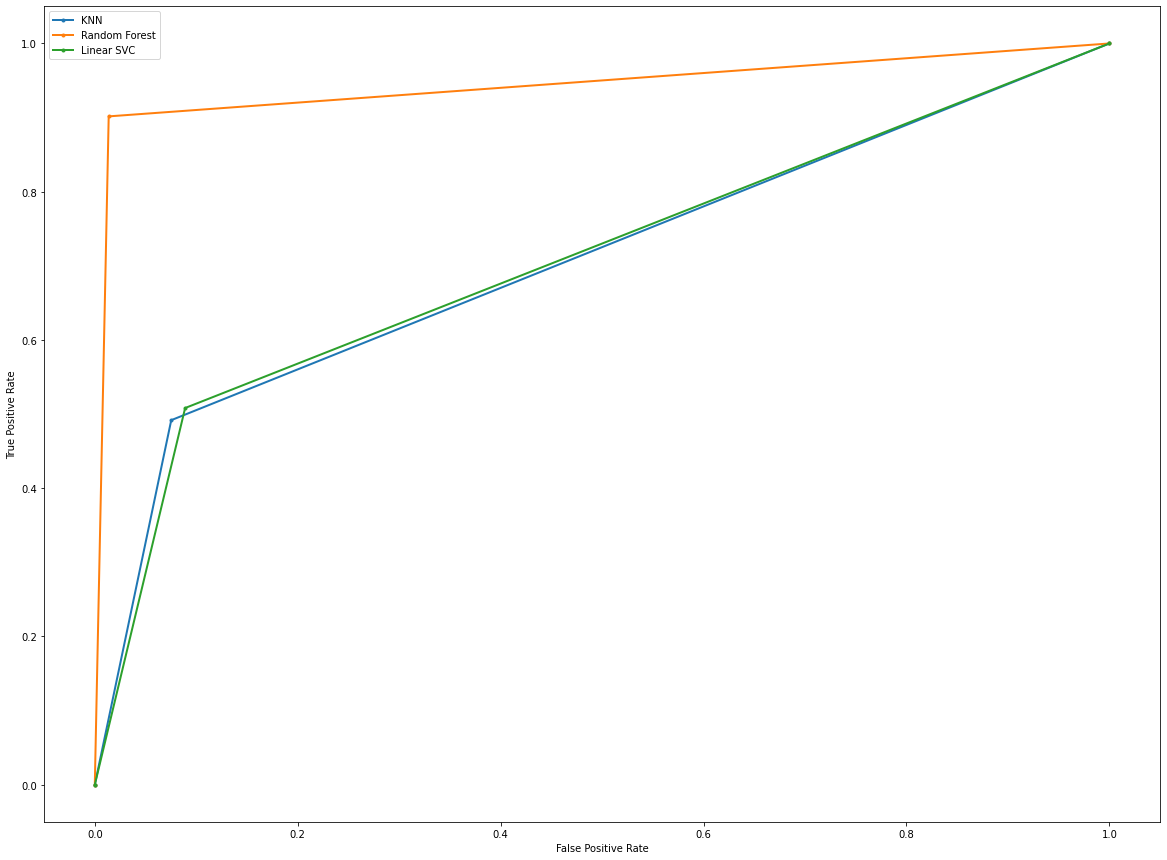

In [ ]:
from sklearn.metrics import roc_curve

svc_fpr, svc_tpr, svc_th = roc_curve(y_test, y_pred_svc)
rf_fpr, rf_tpr, rf_th = roc_curve(y_test, y_pred_rf)
knn_fpr, knn_tpr, knn_th = roc_curve(y_test, y_pred_knn)

plt.figure(figsize=(20,15))
plt.plot(knn_fpr, knn_tpr, marker='.',linewidth=2 , label='KNN')
plt.plot(rf_fpr, rf_tpr, marker='.',linewidth=2 , label='Random Forest')
plt.plot(svc_fpr, svc_tpr, marker='.',linewidth=2 , label='Linear SVC')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'criterion':['gini','entropy'],'n_estimators':[30,35,40,45,50]}]

grid_search = GridSearchCV(model_rf, param_grid, cv=10,scoring='f1')
grid_search.fit(x_train_scaled,y_train)

final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rf_grid_search = final_model.predict(x_test_scaled)

print_metrics(y_test, y_pred_rf_grid_search)


1. Accuracy: 0.97
2. Precision: 1.0
3. Recall: 0.9
4. F1 score: 0.95
5. ROC AUC: 0.95

++ Confusion Matrix ++
Predicted    0   1
Actual            
0          146   0
1            6  55
